In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Logistic Regression

In this assignment you will build a logistic regression model and evaluate the performance of your model.



In [ ]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf


%matplotlib inline
sns.set()
sns.set_context("talk")
py.init_notebook_mode(connected=False)
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In this Assignment we will be working with the breast cancer dataset. This dataset can be loaded using the `sklearn.datasets.load_breast_cancer()` method.  
The data format is not a `pandas.DataFrame` so we will need to do some preprocessing to create a new DataFrame from it.

In [4]:
data = sklearn.datasets.load_breast_cancer()
# data is actually a dictionnary
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's fit a simple model with only one feature.

In [6]:
# Define our features/target
X = df[["mean radius"]]
Y = (data.target == 0)

# Target data['target'] = 0 is malignant, 1 is benign

In [7]:
# Create a 75-25 train-test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 426
Test Data Size: 143


### Question 1

Let's first fit a logistic regression model using the training set. 

For this problem, we will use the existing `LogisticRegression` implementation in sklearn.

Fill in the code below to compute the training and testing accuracy, defined as:

$$
\text{Training Accuracy} = \frac{1}{n_{train\_set}} \sum_{i \in {train\_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

$$
\text{Testing Accuracy} = \frac{1}{n_{test\_set}} \sum_{i \in {test\_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

where $\hat{y_i}$ is the prediction of our model, $y_i$ the true value, and $\mathbb{1}_{y_i == \hat{y_i}}$ an indicator function where 

$\mathbb{1}_{y_i == \hat{y_i}} = 1$ if ${y_i} = \hat{y_i}$, and 

$\mathbb{1}_{y_i == \hat{y_i}} = 0$ if ${y_i} \neq \hat{y_i}$

<!--
BEGIN QUESTION
name: q1
-->

In [8]:
import sklearn.linear_model
from sklearn.metrics import accuracy_score

lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver='lbfgs')
lr.fit(x_train, y_train)

train_predictions = lr.predict(x_train) # write your answer here
train_accuracy = accuracy_score(y_train, train_predictions) # write your answer here

test_predictions = lr.predict(x_test) # write your answer here
test_accuracy = accuracy_score(y_test, test_predictions)
 
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Train accuracy: 0.8709
Test accuracy: 0.9091


### Question 2
It seems we can get a very high test accuracy. How about precision and recall?  
- Precision (also called positive predictive value) is the fraction of true positives among the total number of data points predicted as positive.  
- Recall (also known as sensitivity) is the fraction of true positives among the total number of data points with positive labels.

Precision measures the ability of our classifier to not predict negative samples as positive, while recall is the ability of the classifier to find all the positive samples.

To understand the link between precision and recall, it's useful to create a confusion matrix of our predictions.

Confusion matrix, without normalization
[[85  4]
 [ 9 45]]
Normalized confusion matrix
[[0.95505618 0.04494382]
 [0.16666667 0.83333333]]


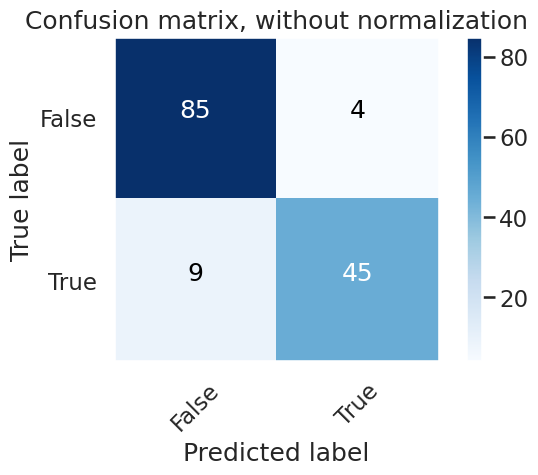

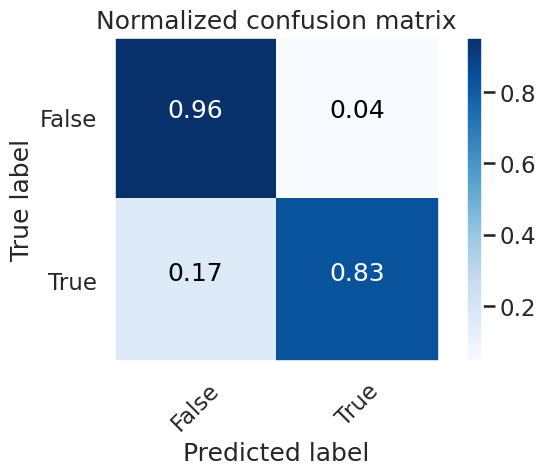

In [9]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Mathematically, Precision and Recall are represented by:
$$
\text{Precision} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_positives}}
$$

$$
\text{Recall} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_negatives}}
$$

Below is a graphical illustration of precision and recall:
![precision_recall](precision_recall.png)

Now let's compute the precision and recall for the test set using the model we got from Question 1.  

**Do not** use `sklearn.metrics` for this computation.

<!--
BEGIN QUESTION
name: q2
-->

In [10]:
y_pred = lr.predict(x_test) 

n_true_positives = sum((y_pred == 1) & (y_test == 1))
n_false_positives = sum((y_pred == 1) & (y_test == 0))
n_false_negatives = sum((y_pred == 0) & (y_test == 1))

precision = n_true_positives / (n_true_positives + n_false_positives) # write your answer here
recall = n_true_positives / (n_true_positives + n_false_negatives) # write your answer here

print(f'Precision = {precision:.4f}')
print(f'Recall = {recall:.4f}')


Precision = 0.9184
Recall = 0.8333


Our precision is fairly high while our recall is a bit lower. Why might we observe these results? Please consider the following plots, which display the distribution of the target variable in the training and testing sets. 

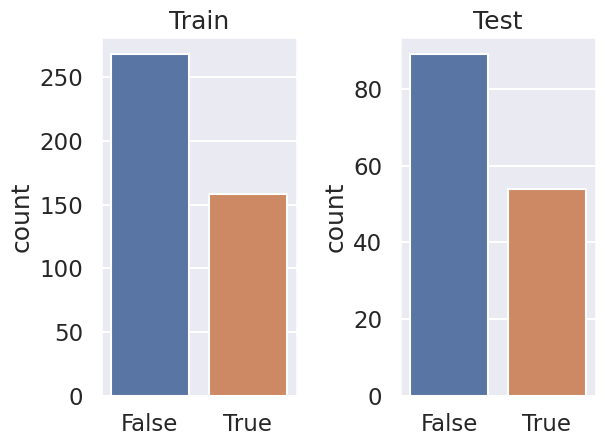

In [11]:
fig, axes = plt.subplots(1, 2)
sns.countplot(x=y_train, ax=axes[0]);
sns.countplot(x=y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();

###  Question 3
Now let's try to analyze the cross entropy loss from logistic regression. The average loss across our entire dataset is:

$$R(\theta) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})  \right) $$

where $\hat{y_i} = \sigma(X_i^T \theta)$. Here, $X_i$ is the i'th row of our Design Matrix $X$, $\theta$ is our weight vector, and $\sigma$ is the sigmoid activation function defined below:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

**Note**: In this assignment, when performing linear algebra operations we interpret both rows and columns as column vectors. So if we wish to calculate the dot product between row $X_i$ and a vector $v$, we would write $X_i^Tv$.

In [ ]:
theta = np.array([lr.coef_[0][0],
                  lr.intercept_[0]])
X_new = np.hstack([X,
                 np.ones([len(X), 1])]) # This is adding a coefficient of 1 for the intercept term
print(theta, '\n')
print(X_new)

In [ ]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def lr_loss(theta, X, Y):
    '''
    Compute the cross entropy loss using X, Y, and theta. You should not need to use a for loop. 
    Hint: The notation B @ v means: compute the matrix multiplication Bv.

    Args:
        theta: The model parameters. 
        X: The design matrix
        Y: The label 

    Return:
        The cross entropy loss.
    '''
    # write your answer here
    z = X @ theta
    y_hat = sigmoid(z)
    loss = -(1 / len(X)) * np.sum(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat))
    return loss

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()